<a href="https://colab.research.google.com/github/Xavier-ML/BIOINFORMATICA-XAVIER-ML/blob/main/Clase_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
1. Describir variables cuantitativas

2. Graficar supervivencia por género

3. Graficar supervivencia por edad

4. encontrar la relación entre el precio y la supervivencia

5. encontrar la relación entre el precio y la clase

6. Extraer los títulos de los nombres(Name), ejemplo: Mr

7. Top 5 de Fallecidos

8. Bottom 5 de Fallecidos

9. Gráfico box plot de rangos de edades de supervivientes




Observaciones adicionales: al que completar datos vacíos, con el promedio de la clase de pasajero

Survived 1: sobrevive, Survived 0 : No
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/train.csv",sep=",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [ ]:
df["Parch"]=df["Parch"].astype("object")

In [ ]:
df.describe()

,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [ ]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
lista=['PassengerId',
 'Survived',
 'Pclass','SibSp']

In [ ]:
for i in lista:
  df[i]=df[i].astype("object")

In [ ]:
#1
df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [ ]:
df.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp           object
Parch           object
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
sexo=df[df["Survived"]==1].groupby("Sex")["PassengerId"].count()
sexo

Sex
female    233
male      109
Name: PassengerId, dtype: int64

<Axes: xlabel='Sex'>

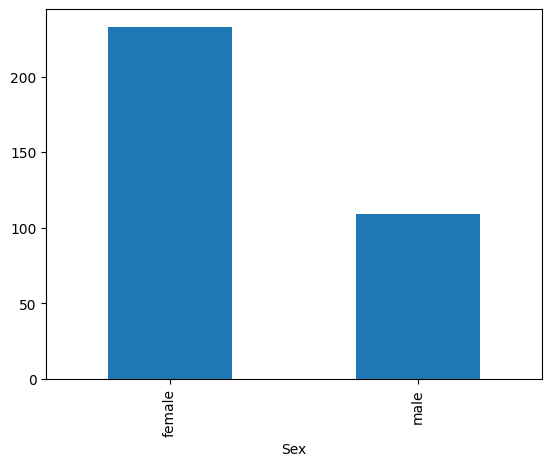

In [ ]:
#2. Graficar supervivencia por género

sexo.plot.bar()

<Axes: ylabel='Frequency'>

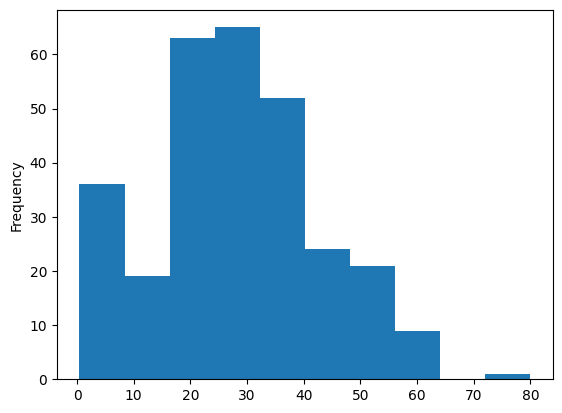

In [ ]:
# 3. Graficar supervivencia por edad

df[df["Survived"]==1].Age.plot.hist()

In [ ]:
import seaborn as sns

<Axes: xlabel='Sex', ylabel='Age'>

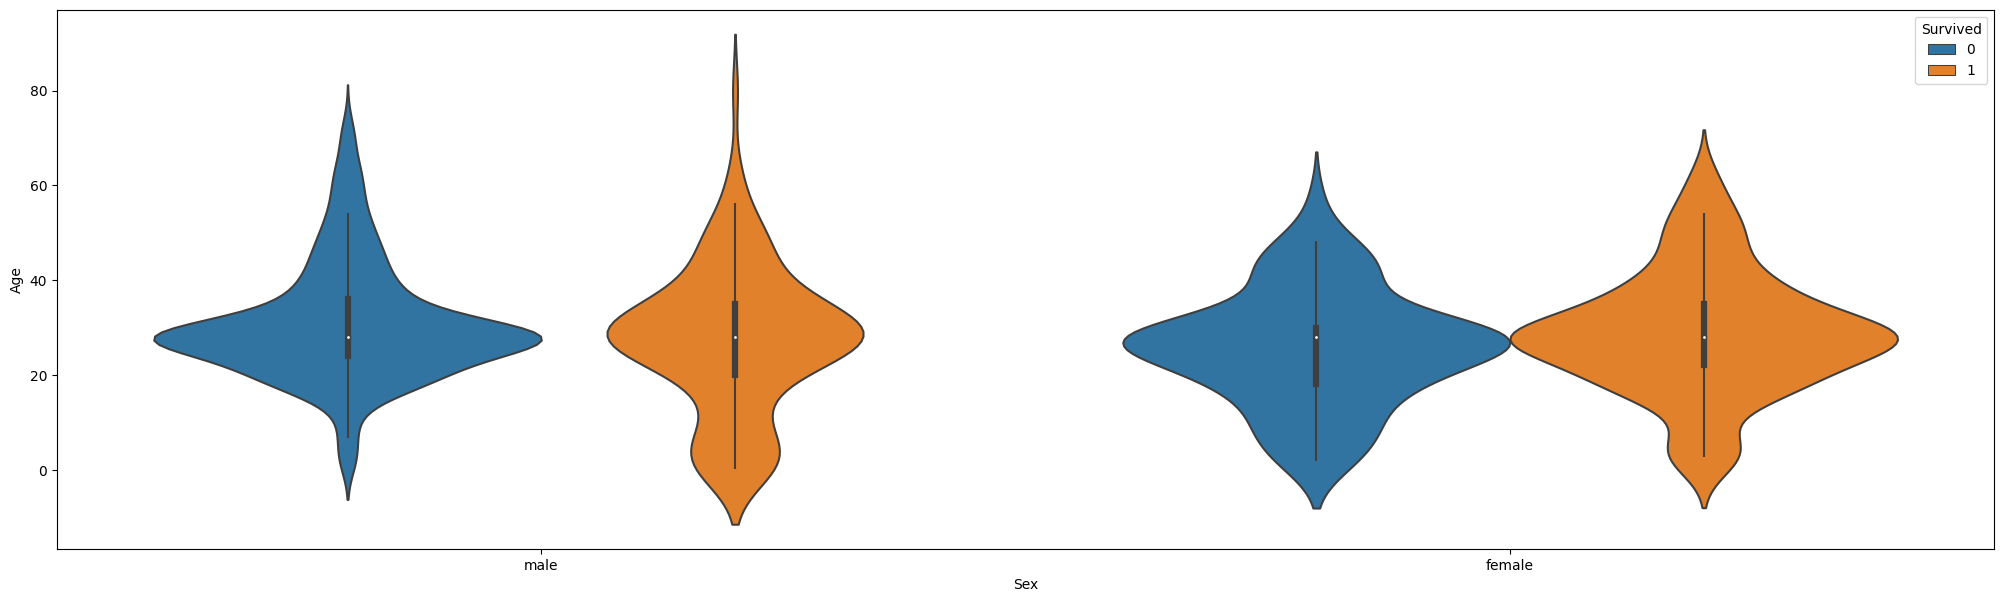

In [ ]:
var=plt.figure(figsize=(25,7))
sns.violinplot(x="Sex",y="Age",hue="Survived",data=df)

<Axes: xlabel='Sex', ylabel='Age'>

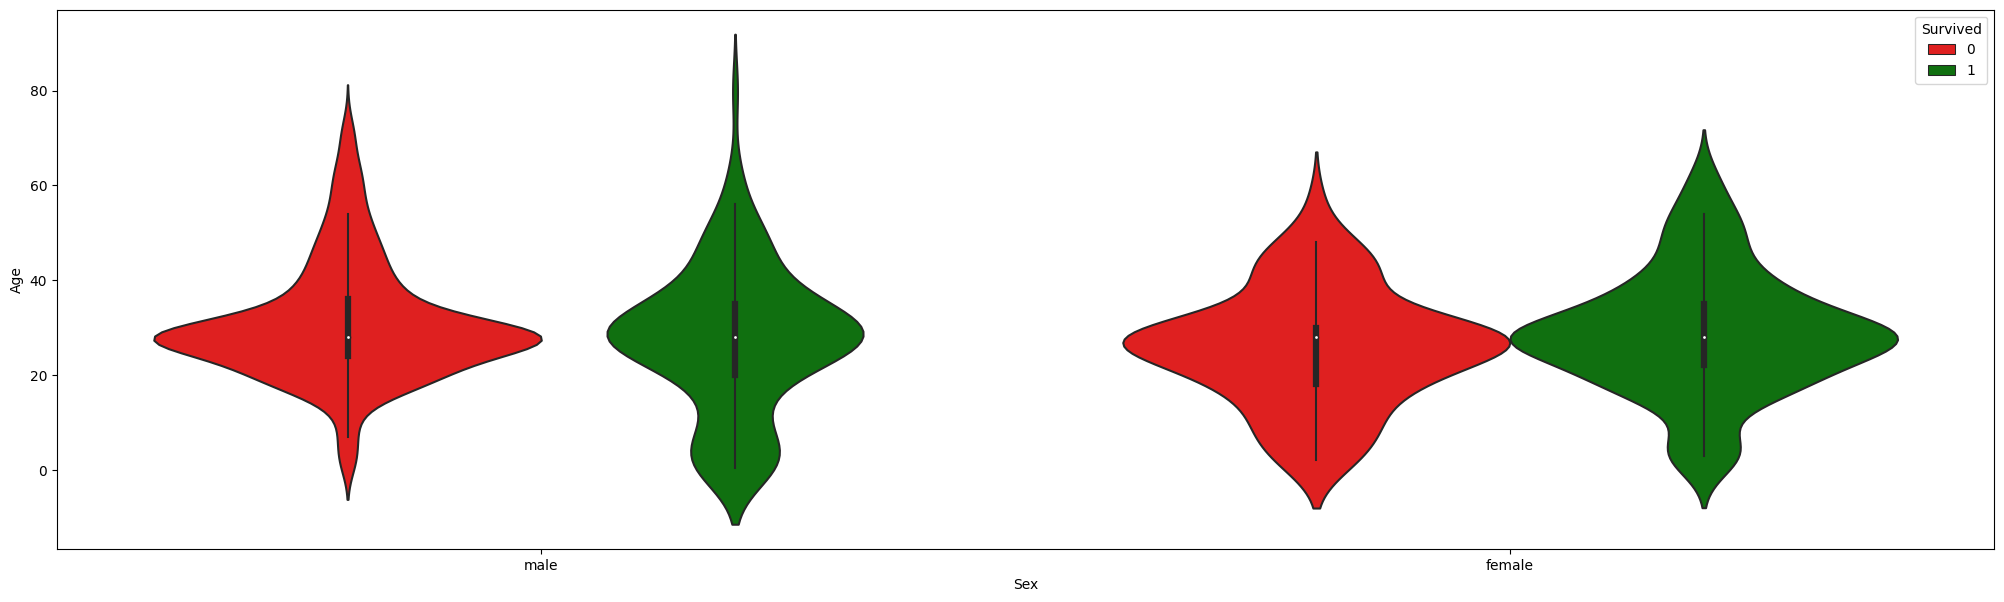

In [ ]:
var=plt.figure(figsize=(25,7))
sns.violinplot(x="Sex",y="Age",hue="Survived",data=df,palette={0:"r",1:"g"})

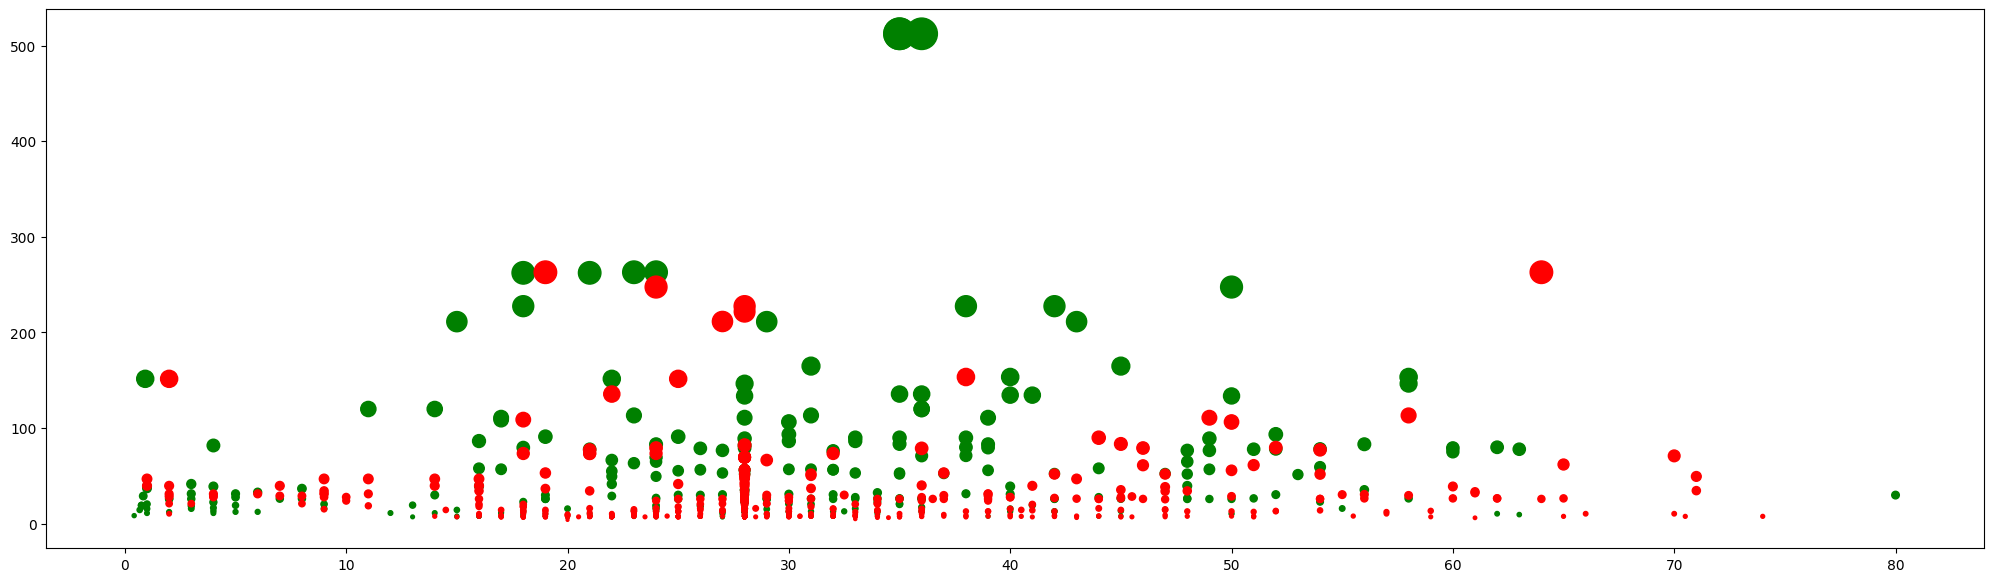

In [ ]:
var=plt.figure(figsize=(25,7))
ax = plt.subplot()



ax.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'],



           c='green', s=df[df['Survived'] == 1]['Fare'])



ax.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'],



           c='red', s=df[df['Survived'] == 0]['Fare']);

<Axes: title={'center': 'Fare'}, xlabel='Survived'>

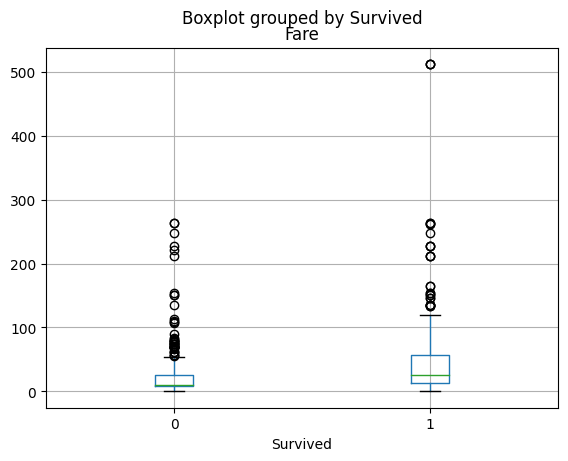

In [ ]:
#4. encontrar la relación entre el precio y la supervivencia

df.boxplot(column="Fare",by="Survived")

<Axes: title={'center': 'Fare'}, xlabel='Pclass'>

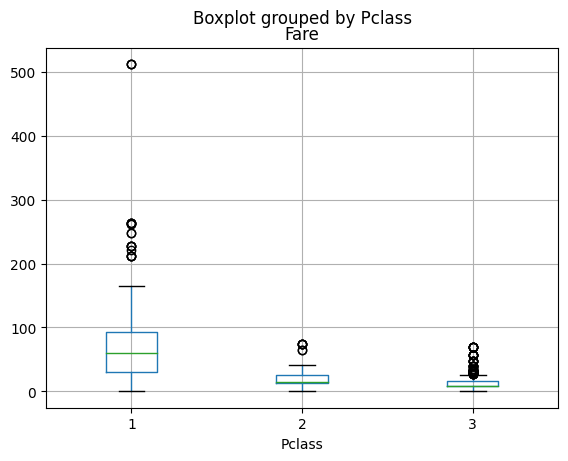

In [ ]:
#5. encontrar la relación entre el precio y la clase

df.boxplot(column="Fare",by="Pclass")

In [ ]:
#6. Extraer los títulos de los nombres(Name), ejemplo: Mr

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import re #Expresion regular

In [ ]:
df3=df.copy()

In [ ]:
a=re.split(", ",df3["Name"][0])
a[1]

'Mr. Owen Harris'

In [ ]:
a=re.search(".","Mrss. Owen Harris")
a.end()

1

In [ ]:
for i in range(len(df3["PassengerId"])):
  a=re.split(", ",df3["Name"][i])
  b=re.split(".",a[1])
  df3["Titulo"][i]=b[0]
df3.head()

<ipython-input-105-b8a15a55172e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Titulo"][i]=b[1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,
